In [1]:
import os
from matplotlib import pyplot as plt 
import numpy as np
import cv2

In [2]:
path = '/disks/data/datasets/selfie_project_datasets/tmp_small'

def scantree(path, ext):
    """Recursively yield DirEntry objects for given directory."""
    for entry in os.scandir(path):
        if entry.is_dir(follow_symlinks=False):
            yield from scantree(entry.path, ext)  # see below for Python 2.x
        elif entry.path.endswith(ext):
            yield entry

def get_img_file_names_in_dir(path, ext):
    return [entry.path for entry in scantree(path, ext)]


files = get_img_file_names_in_dir(path, '.jpg')

no_face_imgs = []
face_imgs = []
for file in files:
    inf_file = file.replace("tmp_small","tmp_small_faceinfo").replace(".jpg",".info")
    if(not os.path.exists(inf_file)):
        no_face_imgs.append(file)
    else:
        face_imgs.append(file)

In [3]:
def _create_montage(imglist, montage_shape, img_sz):
    '''
    creates montage from a list of image filename, montage shape, and per-image size.

    params:
        imglist (str): list of filepaths of the images
        montage_shape (tuple): contains the dimensions (row_count, col_count) of the montage
        img_sz (tuple): contains the dimensions (height, width [, depth) of each image in the montage

    returns:
        numpy ndarray containing the montage of images.
    '''

    # create an empty canvas for the montage
    canvas = np.zeros( (img_sz[0]*montage_shape[0], img_sz[1]*montage_shape[1], 3), np.uint8)

    # fill-up the montage row-by-row
    for icol in range(montage_shape[1]):
        for irow in range(montage_shape[0]):
            # x-y coords to linear index 
            img_idx = irow*montage_shape[1] + icol

            # read and resize the image; on failure use a red placeholder
            try:
                img_fname = imglist[img_idx]
                img = cv2.cvtColor(cv2.resize(cv2.imread(img_fname),(img_sz[1],img_sz[0])), cv2.COLOR_BGR2RGB)
            except Exception as e:
                img = np.zeros((*img_sz[:2],3), np.uint8)
                img[::-1] = 255
                print('file read error',img_fname,e)

            # populate the canvas with the image
            canvas[irow*img_sz[0]: (irow+1)*img_sz[0],
                  icol*img_sz[1]: (icol+1)*img_sz[1],:] = img

    # return the montage        
    return canvas

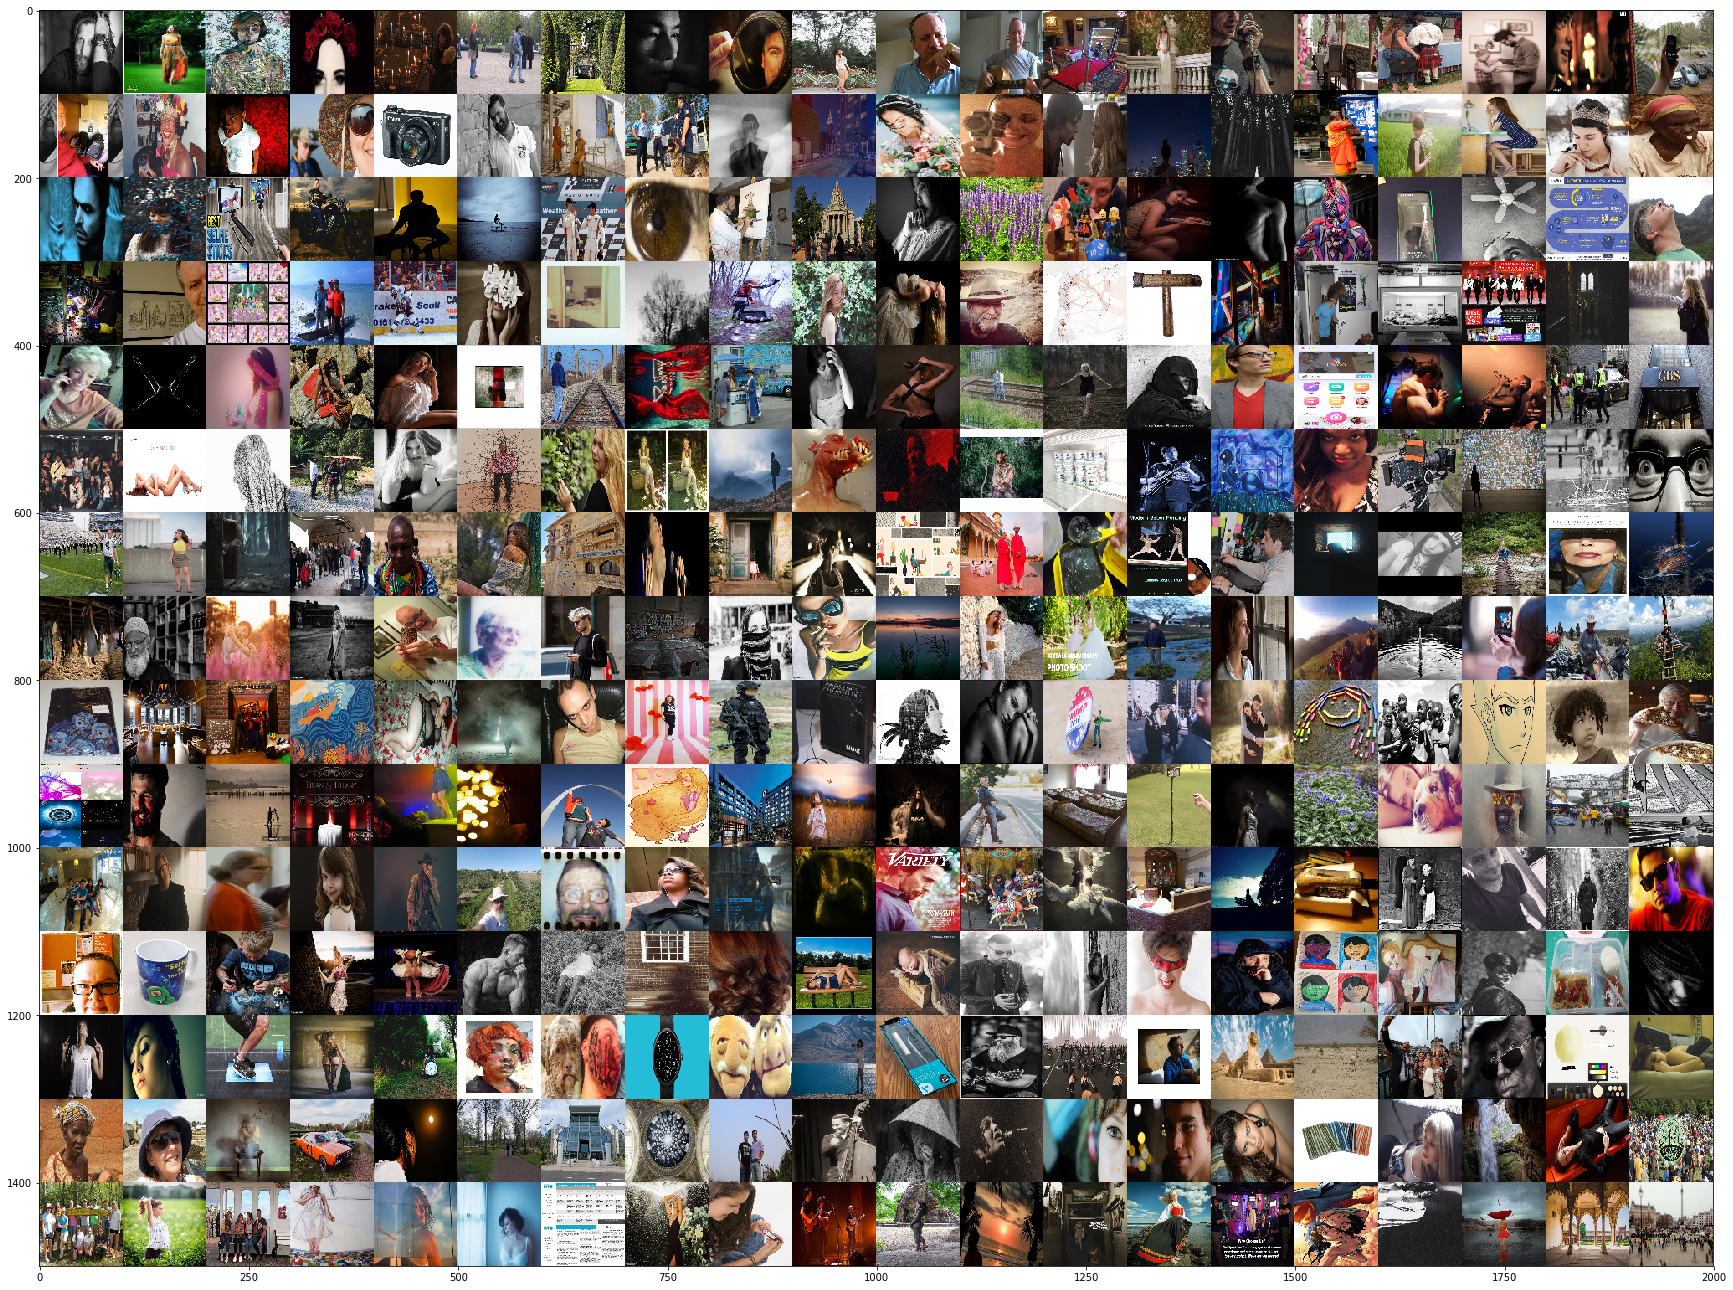

In [7]:
import random

lst = no_face_imgs
#lst = face_imgs

montage_size = (15,20)
figsize = tuple([i*2 for i in montage_size])
indxs = [random.randint(0, len(lst) -1 ) for _ in range(np.prod(montage_size))]

imglist = [lst[i] for i in indxs]
plt.figure(figsize = figsize)
montage = _create_montage(imglist, montage_size, (100,100))

plt.imshow(montage)

In [47]:
imglist[0]

'/disks/data/datasets/selfie_project_datasets/tmp_small/flickr/non_selfie/portrait-gallery/portrait-gallery_22289255953_84ca014eb3_c.jpg'